# ASSIGNMENT PROBLEM

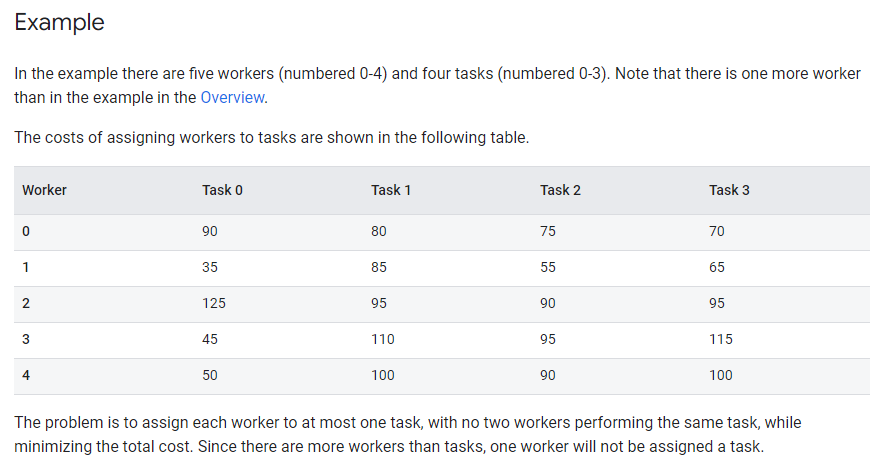

from: https://developers.google.com/optimization/assignment/assignment_example

### Using the Pyomo

In [11]:
!pip install pyomo        # Install in your system 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [25]:
# !pip install --upgrade pip setuptools wheel

  Using cached setuptools-65.3.0-py3-none-any.whl (1.2 MB)
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.36.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\avitr\\AppData\\Local\\Temp\\pip-uninstall-o3jelypq\\pip.exe'
Consider using the `--user` option or check the permissions.



    Uninstalling wheel-0.36.2:
      Successfully uninstalled wheel-0.36.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 52.0.0.post20210125
    Uninstalling setuptools-52.0.0.post20210125:
      Successfully uninstalled setuptools-52.0.0.post20210125
  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1


In [27]:
#!pip install PEP517

  Using cached tomli-2.0.1-py3-none-any.whl (12 kB)


 https://jckantor.github.io/CBE30338/06.04-Linear-Production-Model-in-Pyomo.html

    conda install -c conda-forge pyomo
    conda install -c conda-forge pyomo.extras   # Pyomo has conditional dependencies on various third-party packages 
    conda install -c conda-forge glpk
    
    conda install -c conda-forge ipopt   # not for Windows envr
    
    For windows: download Ipopt-3.14.9-win64-msvs2019-md.zip from https://github.com/coin-or/Ipopt/releases
    upzip and extract exe file. copy to C:\Users\<your user name>\anaconda3\Library\bin
    restart computer
    
 Optionally, you may also wish to install the COIN-OR cbc solvers.

    conda install -c conda-forge coincbc  # not for Windows envr
    
    For Windows: download cbc-win64.zip from https://ampl.com/dl/open/cbc/
    upzip and extract exe file. copy to C:\Users\<your user name>\anaconda3\Library\bin
    restart computer


In [15]:
# imports the required libraries

from pyomo.environ import *
from pyomo.opt import *
#import idaes for github

#opt = solvers.SolverFactory('glpk') 
#opt = solvers.SolverFactory('ipopt') 
opt = solvers.SolverFactory('cbc') 
# Change to "ipopt" for interior point solver

In [16]:
# Create the data

workers = ['w0', 'w1', 'w2', 'w3', 'w4']
tasks = ['t0', 't1', 't2', 't3']

costs = [[90,80,75,70],
      [35,85,55,65],
      [125,95,90,95],
      [45,110,95,115],
      [50,100,90,100]]

In [17]:
model = ConcreteModel()

# Create the variables
model.x = Var(workers, tasks, within=Binary)  

# Create the objective function

model.z = Objective(expr =sum(costs[i][j] * model.x[w, t] for i, w in enumerate(workers) for j, t in enumerate(tasks) ) , 
                    sense=minimize)

# Create the constraints
def all_worker_assigned_rule (model, i):
    return sum(model.x[i,j] for j in tasks) <= 1

model.worker = Constraint(workers, rule=all_worker_assigned_rule)

def all_task_assigned_rule (model, j):
    return sum(model.x[i,j] for i in workers) == 1

model.task = Constraint(tasks, rule=all_task_assigned_rule)

#Invoke the solver
results = opt.solve(model)

In [18]:
model.x.get_values()

{('w0', 't0'): 0.0,
 ('w0', 't1'): 0.0,
 ('w0', 't2'): 0.0,
 ('w0', 't3'): 1.0,
 ('w1', 't0'): 0.0,
 ('w1', 't1'): 0.0,
 ('w1', 't2'): 1.0,
 ('w1', 't3'): 0.0,
 ('w2', 't0'): 0.0,
 ('w2', 't1'): 1.0,
 ('w2', 't2'): 0.0,
 ('w2', 't3'): 0.0,
 ('w3', 't0'): 1.0,
 ('w3', 't1'): 0.0,
 ('w3', 't2'): 0.0,
 ('w3', 't3'): 0.0,
 ('w4', 't0'): 0.0,
 ('w4', 't1'): 0.0,
 ('w4', 't2'): 0.0,
 ('w4', 't3'): 0.0}

In [19]:
model.z.expr()

265.0

#### SENSITIVITY ANALYSIS
    Based on the initial assumptions and the output below, the optimal assignment of 265 hours can be attained by assigning
    Worker 0 to task 3
    Worker 1 to task 2
    Worker 2 to task 1
    Worker 3 to task 0
    Worker 4 to no task

### References
    http://math.jacobs-university.de/oliver/teaching/jacobs/spring2016/ilme202/files/20160401-assignment-problem-Midterm.html

### using the Gurobi package of Python

#### https://medium.com/analytics-vidhya/assignment-problem-in-operations-research-using-python-3fa48ac2d342

In [5]:
!pip install -q gurobipy

In [7]:
from gurobipy import *

In [8]:
# Defining Sets
workers = ['w0', 'w1', 'w2', 'w3', 'w4']
tasks = ['t0', 't1', 't2', 't3']

I = range(len(workers))
J = range(len(tasks))

In [9]:
# Data
costs = [[90,80,75,70],
      [35,85,55,65],
      [125,95,90,95],
      [45,110,95,115],
      [50,100,90,100]]


In [10]:
# create Model
m= Model("Assignment_Model")

In [11]:
# Defining the Variable
X = {}
for i in I:
    for j in J:
       X[i,j] = m.addVar(vtype= GRB.BINARY)

In [12]:
# Objective Function
m.setObjective(quicksum(costs[i][j]*X[i,j] for i in I for j in J), GRB.MINIMIZE)

In [17]:
#Constraint-1
# Each worker is assigned to at most 1 task.
for i in I:
     m.addConstr(quicksum(X[i,j] for j in J) <= 1)
        
#Constraint-2
# Each task is assigned to exactly one worker.
for j in J:
    m.addConstr(quicksum(X[i,j] for i in I) == 1)

In [18]:
m.optimize()
print("Optimized cost",m.objVal, "units")

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 18 rows, 20 columns and 80 nonzeros
Model fingerprint: 0xe15a9dc5
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Loaded MIP start from previous solve with objective 265

Presolve removed 9 rows and 0 columns
Presolve time: 0.00s
Presolved: 9 rows, 20 columns, 40 nonzeros
Variable types: 0 continuous, 20 integer (20 binary)

Root relaxation: cutoff, 6 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0     cutoff    0       265.00000  265.00000  0.00%     -    0s

Explored 1 nodes (6 simplex iterations) in 0.02 seconds 

In [19]:
if m.Status == GRB.OPTIMAL:
    print('Optimal objective: %g' % m.ObjVal)
elif m.Status == GRB.INF_OR_UNBD:
    print('Model is infeasible or unbounded')
    sys.exit(0)
elif m.Status == GRB.INFEASIBLE:
    print('Model is infeasible')
    sys.exit(0)
elif m.Status == GRB.UNBOUNDED:
    print('Model is unbounded')
    sys.exit(0)
else:
    print('Optimization ended with status %d' % m.Status)
    sys.exit(0)

Optimal objective: 265


In [20]:
for i in I:
    print("-"*30)
    print("Workers:",i)
    print("-"*30)   
    for j in J:
        print("   Tasks",j,X[i,j].x)

------------------------------
Workers: 0
------------------------------
   Tasks 0 0.0
   Tasks 1 0.0
   Tasks 2 0.0
   Tasks 3 1.0
------------------------------
Workers: 1
------------------------------
   Tasks 0 0.0
   Tasks 1 0.0
   Tasks 2 1.0
   Tasks 3 0.0
------------------------------
Workers: 2
------------------------------
   Tasks 0 0.0
   Tasks 1 1.0
   Tasks 2 0.0
   Tasks 3 0.0
------------------------------
Workers: 3
------------------------------
   Tasks 0 1.0
   Tasks 1 0.0
   Tasks 2 0.0
   Tasks 3 0.0
------------------------------
Workers: 4
------------------------------
   Tasks 0 0.0
   Tasks 1 0.0
   Tasks 2 0.0
   Tasks 3 0.0


In [21]:
if m.Status == GRB.OPTIMAL:
    print(f'Total cost = {m.objVal}\n')
    for i in range(len(workers)):
        for j in range(len(tasks)):
            # Test if x[i,j] is 1 (with tolerance for floating point arithmetic).
            if X[i, j].x > 0.5:
                print(f'Worker {i} assigned to task {j}.' +
                      f' Cost: {costs[i][j]}')
else:
    print('No solution found.')

Total cost = 265.0

Worker 0 assigned to task 3. Cost: 70
Worker 1 assigned to task 2. Cost: 55
Worker 2 assigned to task 1. Cost: 95
Worker 3 assigned to task 0. Cost: 45


### Using pulp

In [2]:
import sys
try:
    import pulp
except:
    if hasattr(sys, 'real_prefix'):
        #we are in a virtual env.
        !pip install pulp
    else:
        !pip install --user pulp

     --------------------------------------- 14.2/14.2 MB 28.5 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
# Import all classes of PuLP module
from pulp import *

In [2]:
solver_list = listSolvers(onlyAvailable=True)
print(solver_list)

Restricted license - for non-production use only - expires 2023-10-25
No parameters matching '_test' found
['GLPK_CMD', 'CPLEX_PY', 'GUROBI', 'PULP_CBC_CMD']


In [44]:
# https://machinelearninggeek.com/solving-assignment-problem-using-linear-programming-in-python/

# Initialize LP Model
workers=['w1','w2','w3','w4','w5']
jobs=['j1','j2','j3','j4']

# Cost Matrix
costs=[[90,80,75,70],
      [35,85,55,65],
      [125,95,90,95],
      [45,110,95,115],
      [50,100,90,100]]
prob = LpProblem("Assignment_Problem", LpMinimize) 

In [45]:
# The cost data is made into a dictionary
costs= makeDict([workers, jobs], costs, 0)

# Creates a list of tuples containing all the possible assignments
assign = [(w, j) for w in workers for j in jobs]

# A dictionary called 'Vars' is created to contain the referenced variables
vars = LpVariable.dicts("Assign", (workers, jobs), 0, None, LpBinary)

In [46]:
# The objective function is added to 'prob' first
prob += (
    lpSum(  [vars[w][j] * costs[w][j] for (w, j) in assign]),
    "Sum_of_Assignment_Costs",
)

In [47]:
# There are row constraints. Each job can be assigned to only one employee.
# Each worker is assigned to at most 1 task.
for w in workers:
    prob+= lpSum(vars[w][j] for j in jobs) <= 1



# There are column constraints. Each employee can be assigned to only one job.
# Each task is assigned to exactly one worker.

for j in jobs:
    prob+= lpSum(vars[w][j] for w in workers) == 1

In [48]:
# The problem is solved using PuLP's choice of Solver
# default solver (CBC)
prob.solve()
# prob.solve(GLPK(msg = True))
    
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

# Print the variables optimized value
for v in prob.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print("Value of Objective Function = ", value(prob.objective))

Status: Optimal
Assign_w1_j1 = 0.0
Assign_w1_j2 = 0.0
Assign_w1_j3 = 0.0
Assign_w1_j4 = 1.0
Assign_w2_j1 = 0.0
Assign_w2_j2 = 0.0
Assign_w2_j3 = 1.0
Assign_w2_j4 = 0.0
Assign_w3_j1 = 0.0
Assign_w3_j2 = 1.0
Assign_w3_j3 = 0.0
Assign_w3_j4 = 0.0
Assign_w4_j1 = 1.0
Assign_w4_j2 = 0.0
Assign_w4_j3 = 0.0
Assign_w4_j4 = 0.0
Assign_w5_j1 = 0.0
Assign_w5_j2 = 0.0
Assign_w5_j3 = 0.0
Assign_w5_j4 = 0.0
Value of Objective Function =  265.0


    http://math.jacobs-university.de/oliver/teaching/jacobs/spring2016/ilme202/files/20160401-assignment-problem-Midterm.html

### Using Scipy

In [ ]:
# https://www.youtube.com/watch?v=rrfFTdO2Z7I
# https://www.youtube.com/watch?v=Et49N0vjvls
# https://www.youtube.com/watch?v=9j0iIzBZTmY         --- unbalance

In [27]:
import numpy as np
from scipy.optimize import linear_sum_assignment

In [28]:
costs = np.array([[90,80,75,70],
      [35,85,55,65],
      [125,95,90,95],
      [45,110,95,115],
      [50,100,90,100]])

In [31]:
# https://www.youtube.com/watch?v=Et49N0vjvls

row_ind, col_ind = linear_sum_assignment(costs)
opt_ass = col_ind
total_cost = costs[row_ind, col_ind].sum()

In [32]:
print(opt_ass)
print('Total assignment cost is %d' %total_cost)

[3 2 1 0]
Total assignment cost is 265


    worker 0 assign to task 3 cost 70
    worker 1 assign to task 2 cost 55
    worker 2 assign to task 1 cost 95
    worker 3 assign to task 0 cost 45

In [67]:
# transfer to loss Matrix
new_costs=[]
for col in costs:
    new_col=[]
    for row in col:
        new_col +=[row -np.amin(costs)]    # for max: new_col +=[np.amax(costs) - row]
    new_costs +=[new_col]

print(new_costs)

[[55, 45, 40, 35], [0, 50, 20, 30], [90, 60, 55, 60], [10, 75, 60, 80], [15, 65, 55, 65]]


In [68]:
# add dummy job column
#new_costs2=np.concatenate(  (np.zeros((5,1), dtype=int), new_costs), axis=1)    # --- will add zeros to the front
new_costs2 = np.append(new_costs, np.zeros((5,1), dtype=int), axis=1)
print(new_costs2)

[[55 45 40 35  0]
 [ 0 50 20 30  0]
 [90 60 55 60  0]
 [10 75 60 80  0]
 [15 65 55 65  0]]


In [20]:
# add dummy row
# d_row = np.zeros((5,), dtype=int)
# new_matrix = np.vstack((matrix, d_row))

In [69]:
row_ind, col_ind = linear_sum_assignment(new_costs2)
opt_ass = col_ind
total_cost = np.append(costs, np.zeros((5,1), dtype=int), axis=1)[row_ind, col_ind].sum()

In [70]:
print(opt_ass)
print('Total assignment cost is %d' %total_cost)

[3 2 1 0 4]
Total assignment cost is 265


### Using Excel Solver (by adding a dummy column for unbalance matrix):

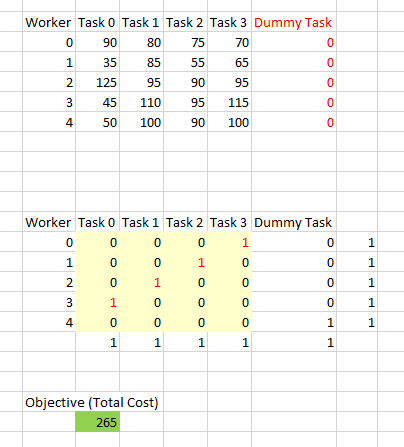



### References
    https://medium.com/analytics-vidhya/optimization-modelling-in-python-scipy-pulp-and-pyomo-d392376109f4
    https://medium.com/opex-analytics/optimization-modeling-in-python-pulp-gurobi-and-cplex-83a62129807a
    